<a href="https://www.kaggle.com/code/vtrackstar/2024-paris-olympics-data-analysis-project?scriptVersionId=194632553" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Ask and Prepare
* **Objective:** Investigate whether there is a relationship between the number of Olympic medals won by countries and their GDP and population.
* **Questions:** Is there a correlation between a country's GDP and the number of Olympic medals it wins? Is there a correlation between a country's population and the number of Olympic medals it wins?
* **Data Collection:**
    * Olympic Medals Data: Collect data on Olympic medal winners, including the country they represented and the number of medals won.
    * Country Metrics Data: Gather data on the GDP and population of each country. You can find this data from sources like the World Bank or IMF.
* **Clean the datasets:** handle missing values and ensure consistent country names across datasets.



In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Load the data locally
file_path = '/kaggle/input/paris2024-olympics-country-level-data/Paris2024_olympics_country_data.csv'


df = pd.read_csv(file_path)
print(df.columns)

new_col = ['Country', 'Continent', 'Number of athletes', 'Female athletes %', 'Population', 'Gold medals', 'Silver medals', 'Bronze medals', 'Total medals', 'GDP', 'GDP per capita']

new_df = df[new_col]
print(new_df.head())

Index(['Unnamed: 0', 'Country', 'Country Code', 'Number of athletes',
       'Gold medals', 'Silver medals', 'Bronze medals', 'Total medals', 'GDP',
       'GDP per capita', 'Population', 'Life expectancy', 'Democracy',
       'Gender equality', 'Continent', 'Female athletes %'],
      dtype='object')
          Country Continent  Number of athletes  Female athletes %  \
0     Afghanistan      Asia                   6              0.500   
1         Albania    Europe                   8              0.375   
2         Algeria    Africa                  45              0.400   
3  American Samoa   Oceania                   2              0.500   
4         Andorra    Europe                   2              0.500   

   Population  Gold medals  Silver medals  Bronze medals  Total medals  \
0  41128771.0            0              0              0             0   
1   2777689.0            0              0              2             2   
2  44903225.0            2              0             

## Process

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


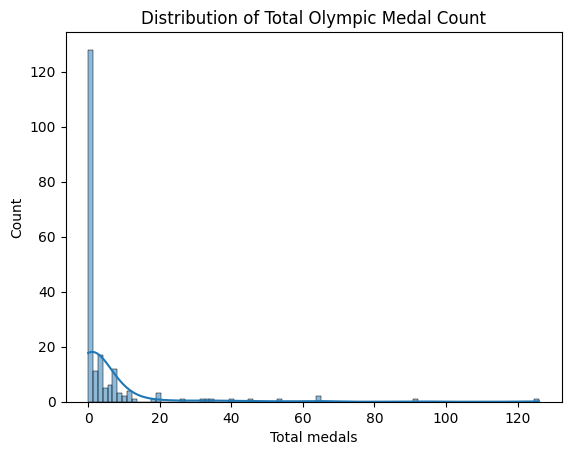

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


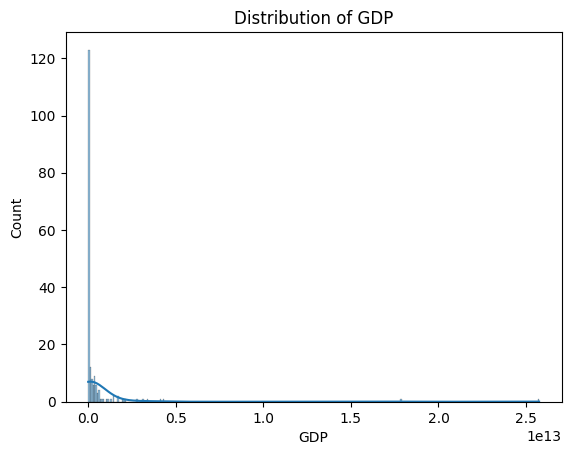

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


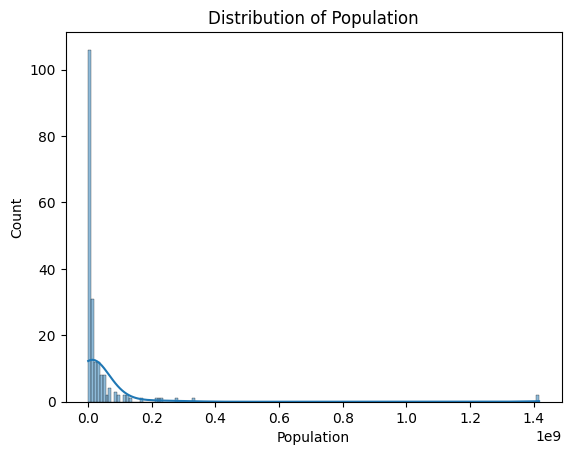

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions of Medal Count, GDP, and Population
sns.histplot(new_df['Total medals'], kde=True)
plt.title('Distribution of Total Olympic Medal Count')
plt.show()

sns.histplot(new_df['GDP'], kde=True)
plt.title('Distribution of GDP')
plt.show()

sns.histplot(new_df['Population'], kde=True)
plt.title('Distribution of Population')
plt.show()

In [4]:
# Calculate correlations
correlation_gdp = new_df[['Total medals', 'GDP']].corr().iloc[0, 1]
correlation_population = new_df[['Total medals', 'Population']].corr().iloc[0, 1]

print(f'Correlation between Total Medal Count and GDP: {correlation_gdp}')
print(f'Correlation between Total Medal Count and Population: {correlation_population}')

Correlation between Total Medal Count and GDP: 0.8546428865728127
Correlation between Total Medal Count and Population: 0.42555519030504985


## Analyze

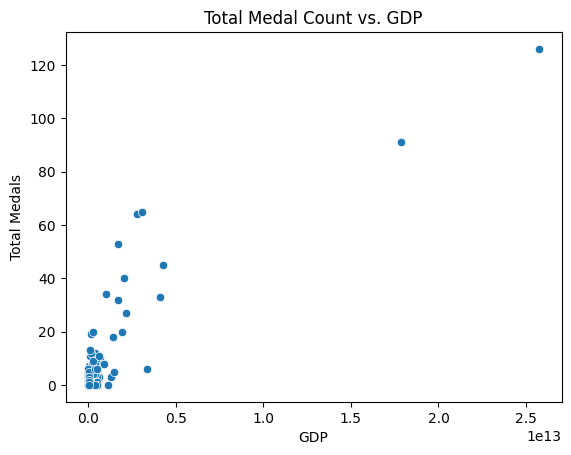

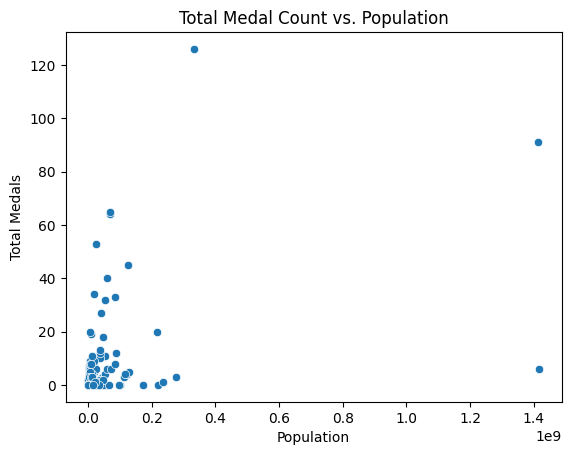

In [5]:
# Scatter plots
sns.scatterplot(x='GDP', y='Total medals', data=new_df)
plt.title('Total Medal Count vs. GDP')
plt.xlabel('GDP')
plt.ylabel('Total Medals')
plt.show()

sns.scatterplot(x='Population', y='Total medals', data=new_df)
plt.title('Total Medal Count vs. Population')
plt.xlabel('Population')
plt.ylabel('Total Medals')
plt.show()


Mean Squared Error: 45.89138972628627


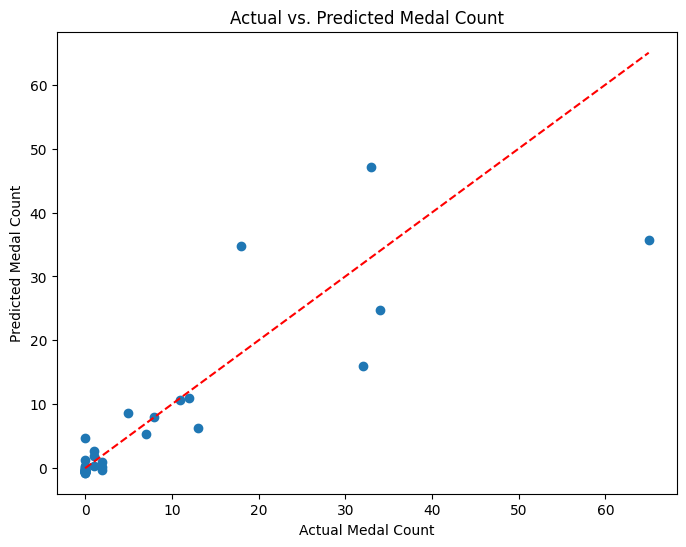

In [7]:
# Machine Learning - Predicting Number of Medals vs GDP, Pop, Num of Athletes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

        # Assuming 'X' contains your features and 'y' contains 'Total medals'
X = new_df[['GDP', 'Population', 'Number of athletes']]
y = new_df['Total medals']

# Remove rows with missing values 
X = X.dropna()
y = y[X.index] # Ensure y has the same indices as X after removing rows

        # Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

        # Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize Model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Medal Count")
plt.ylabel("Predicted Medal Count")
plt.title("Actual vs. Predicted Medal Count")

# Add a line of perfect prediction (45-degree line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

plt.show()

## Share
### [Link to Interactive Tableau Dashboard](https://public.tableau.com/views/2024ParisOlympicsCountryCaseStudy/PopvsGDPfortop10medalingcountries?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)
* Since the correlation between GDP and medal count is strong at **0.85**, countries with higher GDPs tend to win more medals.
* The correlation between population and medal count is moderate at **0.43**, meaning countries with large populations have the potential to draw from a bigger talent pool but this doesn't necessarily determine the quality of those athletes as it relates to medaling in an event.

## Insights and Recommendations
* **Machine Learning Model for Predicting Medals Insights**
    * A linear regression model utilizing GDP, population, and the number of athletes can predict a nation's medal count with moderate accuracy. 
    * The model's performance could be enhanced by exploring other potential factors, such as climate, sporting infrastructure, or historical Olympic performance.
    * Gathering more data or refining the model with additional variables can help improve the accuracy of the model.
* **Resource Allocation:**
    * Nations, particularly those with large populations, should prioritize economic resources to boost their sports programs. Investing in sports infrastructure, elite athlete development programs, and international competitions can help translate economic power into Olympic success.
* **Policy Implications:**
    * Governments in countries with **high GDPs** should use their economic advantage to create comprehensive sports programs that include everything from youth sports to elite training facilities. They can also invest in advanced sports science, injury prevention, and recovery programs to give their athletes a competitive edge.
    * In countries with **large populations but lower GDP**, governments and sports organizations can focus on developing cost-effective training programs that reach a wide audience. Emphasizing community sports, school-based programs, and affordable access to training can help uncover and develop hidden talent.
    * Countries with **lower GDPs** but a strong sports culture might focus on niche sports where competition is less intense or where they have historical strengths. This allows for a more focused and efficient use of limited resources.
* **Further Analysis:** 
    * A study that compares countries' per capita spending on sports programs and their corresponding medal counts might reveal how efficiently countries convert resources into medals.